In [2]:
!pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("averkij/tennessee-eastman-process-simulation-dataset")
print("Path to dataset files:", path)

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████| 1.28G/1.28G [02:51<00:00, 7.99MB/s]

Extracting files...


Path to dataset files: C:\Users\syj43\.cache\kagglehub\datasets\averkij\tennessee-eastman-process-simulation-dataset\versions\1


In [4]:
import os
os.listdir(path)

['TEP_FaultFree_Testing.RData',
 'TEP_FaultFree_Training.RData',
 'TEP_Faulty_Testing.RData',
 'TEP_Faulty_Training.RData']

# Content
Each .RData file is an external representation of an R dataframe that can be read into an R environment with the 'load' function. The variables loaded are named ‘fault_free_training’, ‘fault_free_testing’, ‘faulty_testing’, and ‘faulty_training’, corresponding to the RData files.

Each dataframe contains 55 columns:

Column 1 ('faultNumber') ranges from 1 to 20 in the “Faulty” datasets and represents the fault type in the TEP. The “FaultFree” datasets only contain fault 0 (i.e. normal operating conditions).

Column 2 ('simulationRun') ranges from 1 to 500 and represents a different random number generator state from which a full TEP dataset was generated (Note: the actual seeds used to generate training and testing datasets were non-overlapping).

Column 3 ('sample') ranges either from 1 to 500 (“Training” datasets) or 1 to 960 (“Testing” datasets). The TEP variables (columns 4 to 55) were sampled every 3 minutes for a total duration of 25 hours and 48 hours respectively. Note that the faults were introduced 1 and 8 hours into the Faulty Training and Faulty Testing datasets, respectively.

Columns 4 to 55 contain the process variables; the column names retain the original variable names.

link to the data : https://www.kaggle.com/datasets/averkij/tennessee-eastman-process-simulation-dataset

In [6]:
!pip install pyreadr

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 7.9 MB/s eta 0:00:00


In [81]:
# read the R files with the use of pyreader
import pyreadr
df_fault = pyreadr.read_r(path+'/TEP_Faulty_Training.RData')
df_fault = df_fault['faulty_training']
df_fault.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [82]:
df_fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 55 columns):
 #   Column         Dtype  
---  ------         -----  
 0   faultNumber    int32  
 1   simulationRun  float64
 2   sample         int32  
 3   xmeas_1        float64
 4   xmeas_2        float64
 5   xmeas_3        float64
 6   xmeas_4        float64
 7   xmeas_5        float64
 8   xmeas_6        float64
 9   xmeas_7        float64
 10  xmeas_8        float64
 11  xmeas_9        float64
 12  xmeas_10       float64
 13  xmeas_11       float64
 14  xmeas_12       float64
 15  xmeas_13       float64
 16  xmeas_14       float64
 17  xmeas_15       float64
 18  xmeas_16       float64
 19  xmeas_17       float64
 20  xmeas_18       float64
 21  xmeas_19       float64
 22  xmeas_20       float64
 23  xmeas_21       float64
 24  xmeas_22       float64
 25  xmeas_23       float64
 26  xmeas_24       float64
 27  xmeas_25       float64
 28  xmeas_26       float64
 29  xmeas_27      

In [83]:
# check the existence of missing values
df_fault.isna().sum()

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

In [84]:
df_fault['faultNumber'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

Draw histograms of each TEP variable

In [85]:
# make a list of TEP variables
tep = df_fault.columns[3:].to_list()
len(tep)

52

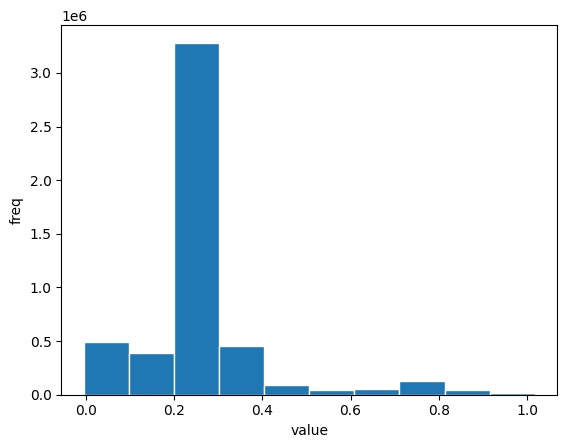

In [86]:
import matplotlib.pyplot as plt
plt.hist(df_fault[tep[0]], edgecolor='w')
plt.xlabel('value')
plt.ylabel('freq')
plt.show()

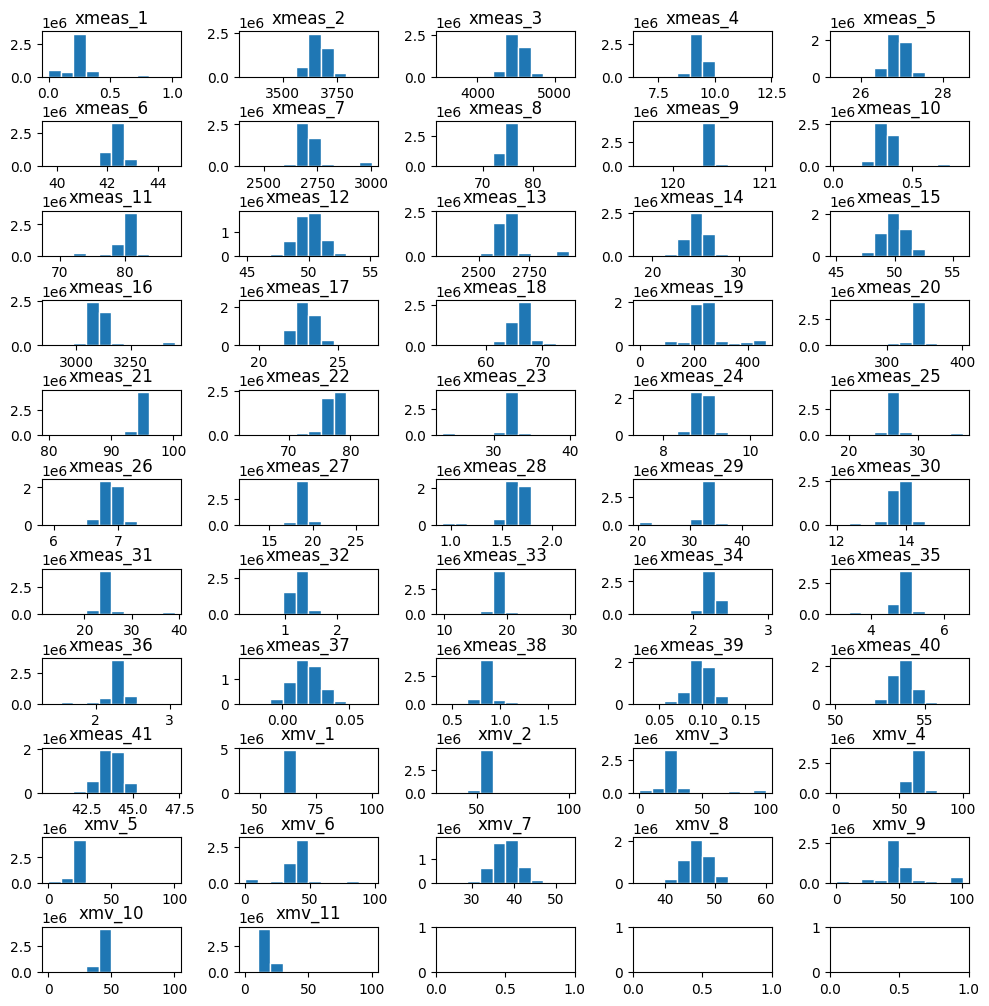

In [90]:
fig, axs = plt.subplots(11, 5, figsize=(10,10))
fig.tight_layout()
for i in range(len(tep)):
    axs[i//5, i%5].hist(df_fault[tep[i]], edgecolor='w')
    axs[i//5, i%5].set_title(tep[i])
plt.show()

In [91]:
fig.savefig('df_fault.png')

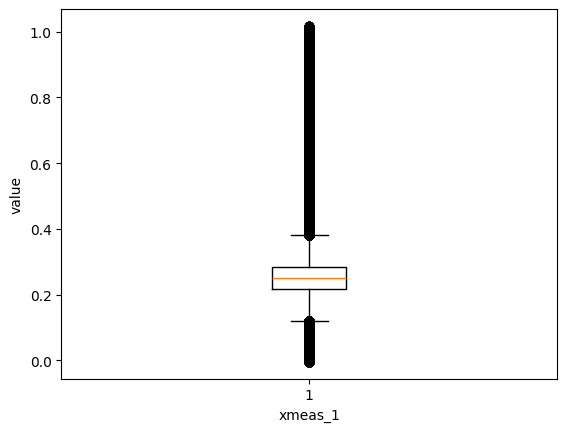

In [92]:
# their distributions appear not too bad, yet recheck them with box plot
plt.boxplot(df_fault[tep[0]])
plt.xlabel(tep[0])
plt.ylabel('value')
plt.show()

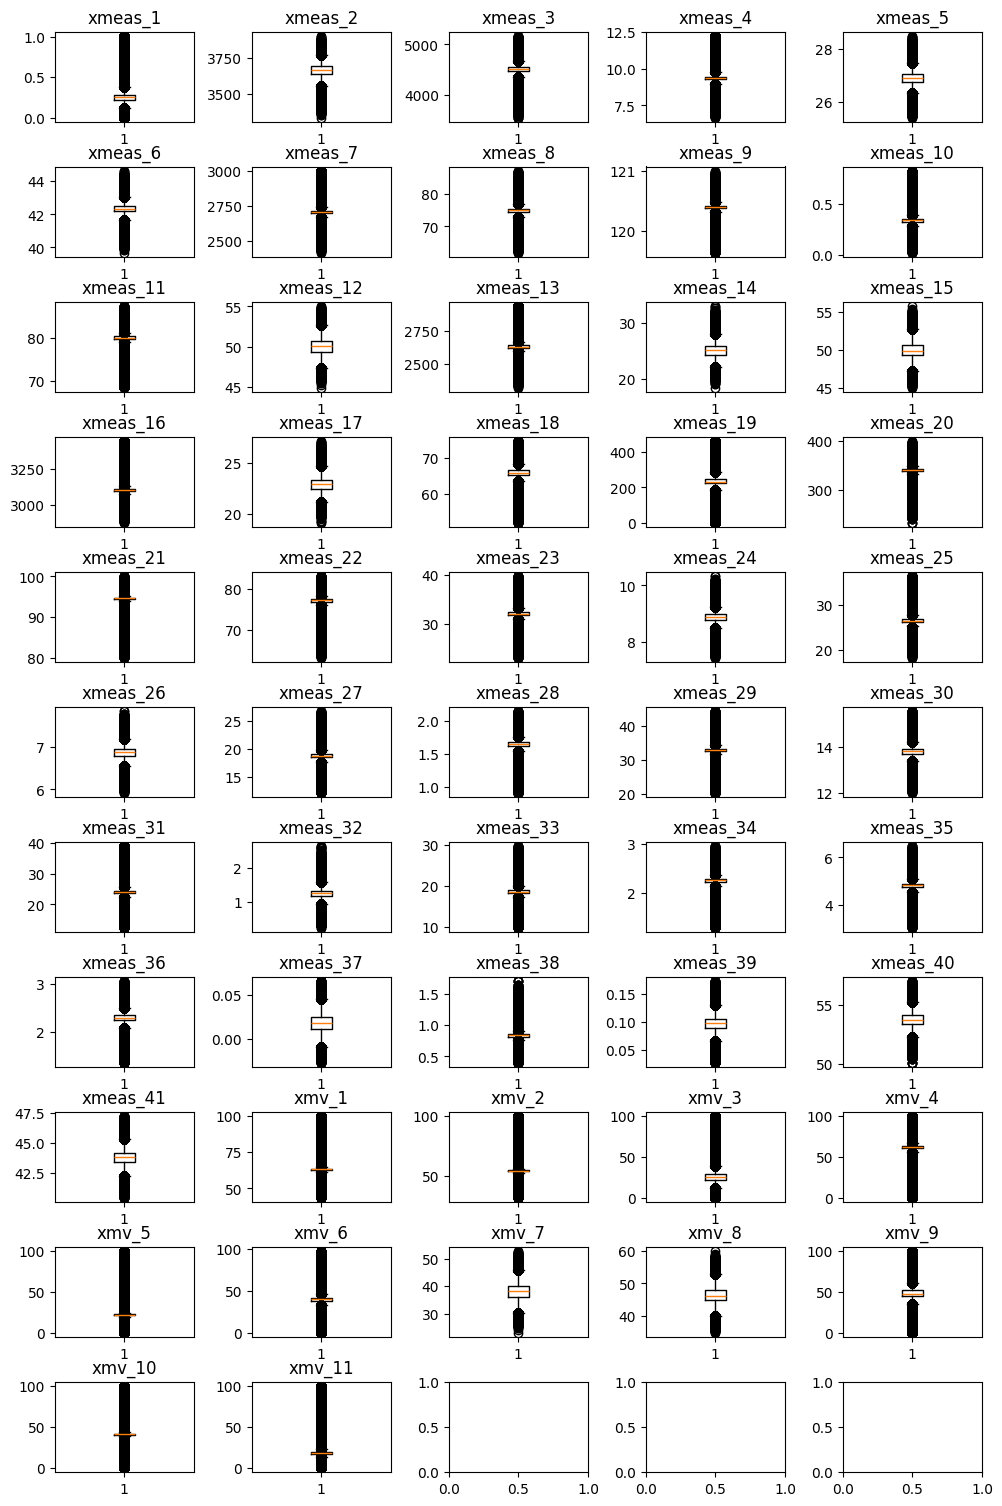

In [93]:
fig, axs = plt.subplots(11, 5, figsize=(10,15))
fig.tight_layout()
for i in range(len(tep)):
    axs[i//5, i%5].boxplot(df_fault[tep[i]])
    axs[i//5, i%5].set_title(tep[i])
plt.show()

There are too many outliers for now. Better turn to the log scale. To this end, check whether there exists zero or not.

In [94]:
df_fault.describe()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,...,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.050000e+01,2.505000e+02,2.505000e+02,2.613588e-01,3.663777e+03,4.506046e+03,9.370345e+00,2.690156e+01,4.236419e+01,2.723005e+03,...,5.431755e+01,3.043177e+01,6.324830e+01,2.295485e+01,3.992297e+01,3.807265e+01,4.643742e+01,5.060598e+01,4.194845e+01,1.884376e+01
std,5.766282e+00,1.443373e+02,1.443373e+02,1.495384e-01,4.316941e+01,1.110368e+02,3.646151e-01,2.320034e-01,3.172128e-01,7.599384e+01,...,5.258092e+00,2.048365e+01,7.400080e+00,1.108258e+01,1.293348e+01,2.949138e+00,2.358468e+00,1.759840e+01,1.001227e+01,5.176705e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,-4.735000e-03,3.327400e+03,3.540700e+03,6.639900e+00,2.538600e+01,3.965600e+01,2.413800e+03,...,3.118400e+01,-2.718600e-01,-4.893100e-03,-9.941000e-02,0.000000e+00,2.280100e+01,3.492300e+01,-3.635500e-01,-2.809500e-01,-5.327000e-03
25%,5.750000e+00,1.257500e+02,1.257500e+02,2.183000e-01,3.636500e+03,4.469000e+03,9.264200e+00,2.676000e+01,4.218100e+01,2.697600e+03,...,5.349700e+01,2.228000e+01,6.031400e+01,2.142300e+01,3.831300e+01,3.604900e+01,4.487800e+01,4.547900e+01,4.057500e+01,1.714300e+01
50%,1.050000e+01,2.505000e+02,2.505000e+02,2.511300e-01,3.663300e+03,4.508500e+03,9.355200e+00,2.690100e+01,4.234800e+01,2.705600e+03,...,5.397000e+01,2.521500e+01,6.149900e+01,2.212900e+01,3.996700e+01,3.815000e+01,4.633900e+01,4.806500e+01,4.120600e+01,1.829500e+01
75%,1.525000e+01,3.752500e+02,3.752500e+02,2.832100e-01,3.690200e+03,4.548000e+03,9.456800e+00,2.704300e+01,4.252400e+01,2.715000e+03,...,5.444300e+01,2.879700e+01,6.284100e+01,2.273800e+01,4.150700e+01,3.999100e+01,4.803100e+01,5.188700e+01,4.194900e+01,1.953700e+01
max,2.000000e+01,5.000000e+02,5.000000e+02,1.017500e+00,3.906700e+03,5.175800e+03,1.224000e+01,2.848600e+01,4.465300e+01,3.000500e+03,...,1.000000e+02,1.001900e+02,1.000200e+02,1.001100e+02,9.752800e+01,5.312100e+01,5.998000e+01,1.005200e+02,1.003200e+02,1.000100e+02


In [63]:
df_fault[df_fault[tep[0]]<=0].index

Index([   2520,    2521,    2522,    2527,    2528,    2530,    2531,    2533,
          2534,    2536,
       ...
       4992990, 4992991, 4992992, 4992993, 4992994, 4992995, 4992996, 4992997,
       4992998, 4992999],
      dtype='int64', length=210987)

In [64]:
# though their are some negative values, they seem to be positioned a bit far away from the mean values
# let's just drop them and take the log of them
dropIdx = []
for i in tep:
    dropIdx.extend(df_fault[df_fault[i]<=0].index)
dropIdx = list(set(dropIdx))
len(dropIdx)

477766

In [65]:
df_fault = df_fault.drop(dropIdx).reset_index(drop=True)
df_fault.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


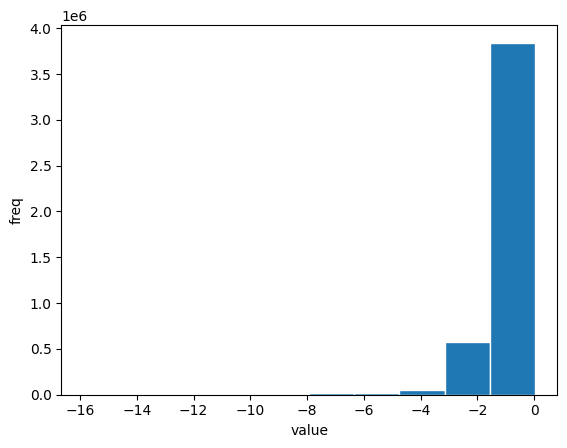

In [77]:
plt.hist(np.log(df_fault_log[tep[0]]), edgecolor='w')
plt.xlabel('value')
plt.ylabel('freq')
plt.show()

In [66]:
# take log by using .apply method
df_fault_log = df_fault.copy()
for i in tep:
    df_fault_log[i].apply(lambda x: np.log(x))

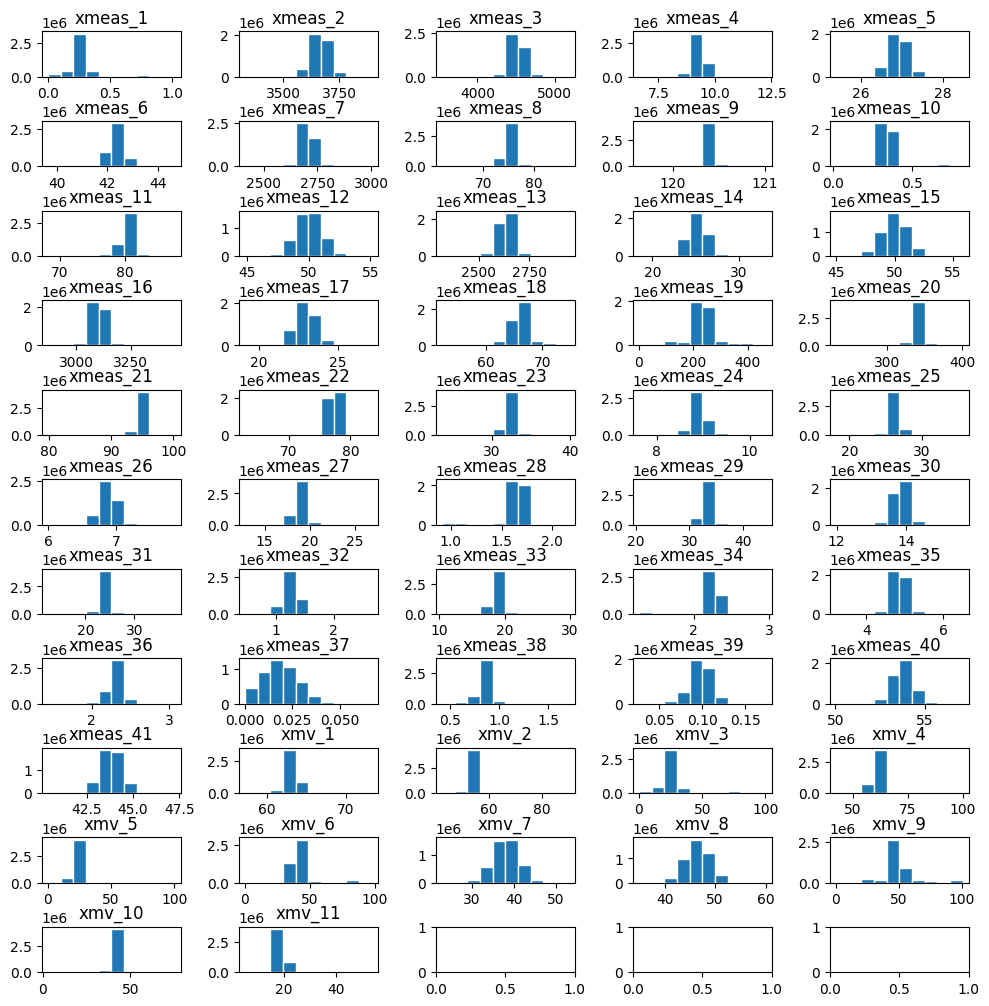

In [68]:
# plot the variables again - any better than before?
fig, axs = plt.subplots(11, 5, figsize=(10,10))
fig.tight_layout()
for i in range(len(tep)):
    axs[i//5, i%5].hist(df_fault_log[tep[i]], edgecolor='w')
    axs[i//5, i%5].set_title(tep[i])
plt.show()

In [70]:
fig.savefig('df_fault_log.png')

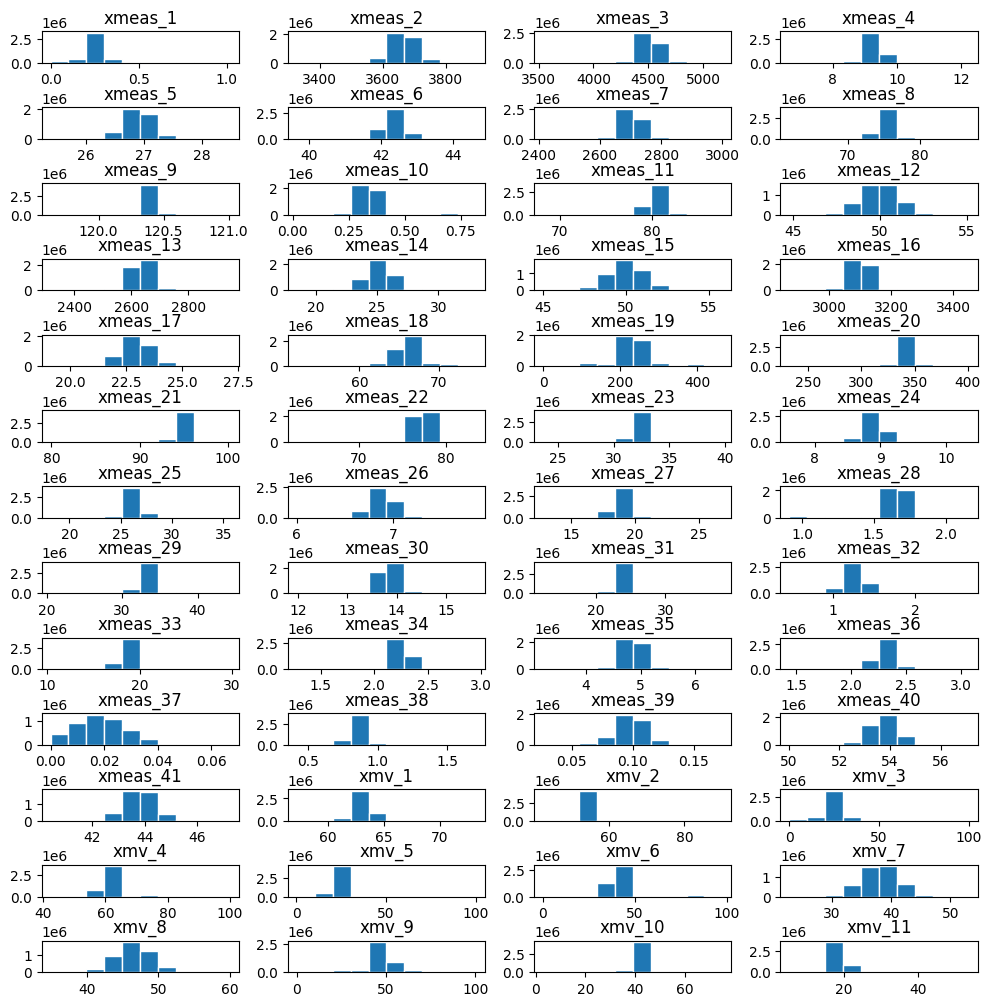

In [78]:
fig, axs = plt.subplots(13, 4, figsize=(10,10))
fig.tight_layout()
for i in range(len(tep)):
    axs[i//4, i%4].hist(df_fault_log[tep[i]], edgecolor='w')
    axs[i//4, i%4].set_title(tep[i])
plt.show()

In [6]:
df_free = pyreadr.read_r(path+'/TEP_FaultFree_Training.RData')
df_free = df_free['fault_free_training']
df_free.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [8]:
# faultNumber==0 refers to being fault-free
df_free['faultNumber'].unique()

array([0.])

In [9]:
# missing values?
df_free.isna().sum()

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

In [11]:
import numpy as np
np.any(df_free.isna().sum()!=0)

np.False_